In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pathlib
import random
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

In [ ]:
!wget 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
f = zipfile.ZipFile('pizza_steak.zip')
f.extractall()

--2023-05-29 00:09:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.234.128, 142.250.152.128, 142.251.171.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.234.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   143MB/s    in 0.7s    

2023-05-29 00:09:23 (143 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
#get the data
dir_path='pizza_steak/'
for dirpath, dirnames, filenames in os.walk(f'{dir_path}'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak/
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [ ]:
data_dir=pathlib.Path(f'{dir_path}/train')
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
#lets visualize our images
def view_random_image(target_dir, target_class):
    target_folder=target_dir+target_class
    random_img=random.sample(os.listdir(target_folder),1)
    img=mpimg.imread(target_folder+'/'+random_img[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape: {img.shape}")
    return img

Image shape: (512, 512, 3)


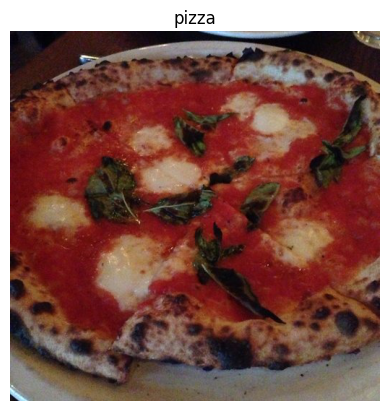

In [ ]:
img=view_random_image(f'{dir_path}/train/','pizza')

In [ ]:
img=tf.constant(img)
img

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 27,  19,  30],
        [ 23,  15,  26],
        [ 20,  12,  23],
        ...,
        [123, 116,  87],
        [125, 119,  87],
        [131, 125,  93]],

       [[ 23,  15,  26],
        [ 24,  16,  27],
        [ 25,  17,  28],
        ...,
        [127, 116,  86],
        [126, 115,  83],
        [135, 124,  92]],

       [[ 21,  13,  24],
        [ 23,  15,  26],
        [ 25,  17,  28],
        ...,
        [132, 117,  84],
        [128, 114,  79],
        [129, 115,  80]],

       ...,

       [[ 29,  20,  21],
        [ 32,  23,  26],
        [ 26,  17,  22],
        ...,
        [148, 150, 137],
        [146, 150, 135],
        [152, 156, 141]],

       [[ 26,  21,  18],
        [ 29,  24,  21],
        [ 27,  21,  21],
        ...,
        [148, 150, 136],
        [146, 150, 135],
        [151, 155, 140]],

       [[ 32,  29,  24],
        [ 28,  25,  20],
        [ 21,  17,  14],
        ...,
        [149, 151, 13

In [ ]:
#preprocess the data
tf.random.set_seed(100)
train_datagen= ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
train_dir_path=dir_path+"/train"
test_dir_path=dir_path+"/test"
train_data=train_datagen.flow_from_directory(train_dir_path, batch_size=32, target_size=(224,224), class_mode='binary', seed=100)
valid_data=valid_datagen.flow_from_directory(test_dir_path,batch_size=32,target_size=(224,224), class_mode='binary', seed=100)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#build the model
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)))
model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'))
model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'))
model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
#compiling the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
               metrics=['accuracy'])
history_1=model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 27s 251ms/step - loss: 0.6679 - accuracy: 0.5527 - val_loss: 0.6326 - val_accuracy: 0.6280
Epoch 2/5
47/47 [==============================] - 10s 224ms/step - loss: 0.5799 - accuracy: 0.6973 - val_loss: 0.4560 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 10s 222ms/step - loss: 0.5182 - accuracy: 0.7440 - val_loss: 0.4693 - val_accuracy: 0.7540
Epoch 4/5
47/47 [==============================] - 10s 224ms/step - loss: 0.4369 - accuracy: 0.8000 - val_loss: 0.4221 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 10s 211ms/step - loss: 0.3824 - accuracy: 0.8360 - val_loss: 0.2929 - val_accuracy: 0.8860


Image shape: (512, 384, 3)
Image shape: (512, 512, 3)


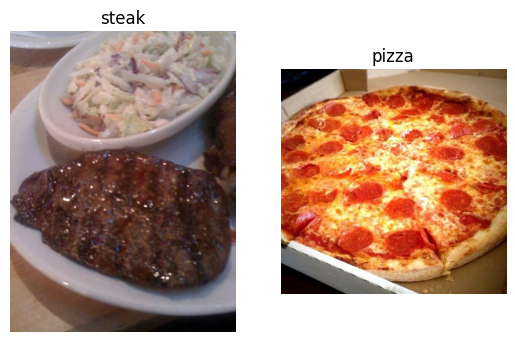

In [ ]:
#building a new model
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image(f'{dir_path}train/', 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image(f'{dir_path}train/', 'pizza')

In [ ]:
#preprocessing the data
train_dir_path = f'{dir_path}train/'
test_dir_path = f'{dir_path}test/'
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir_path,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir_path,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
images[:2], images[0].shape

(array([[[[0.62352943, 0.47450984, 0.33333334],
          [0.62352943, 0.47450984, 0.33333334],
          [0.6156863 , 0.47450984, 0.34117648],
          ...,
          [0.7058824 , 0.6509804 , 0.6509804 ],
          [0.7019608 , 0.64705884, 0.64705884],
          [0.7294118 , 0.6666667 , 0.6784314 ]],
 
         [[0.6156863 , 0.4784314 , 0.32941177],
          [0.6117647 , 0.4784314 , 0.33333334],
          [0.6117647 , 0.4784314 , 0.34117648],
          ...,
          [0.70980394, 0.6666667 , 0.6509804 ],
          [0.69411767, 0.6509804 , 0.63529414],
          [0.6901961 , 0.64705884, 0.6392157 ]],
 
         [[0.60784316, 0.48235297, 0.32941177],
          [0.60784316, 0.48235297, 0.33333334],
          [0.6       , 0.48235297, 0.34901962],
          ...,
          [0.7686275 , 0.7294118 , 0.69411767],
          [0.76470596, 0.7294118 , 0.69411767],
          [0.7411765 , 0.7058824 , 0.67058825]],
 
         ...,
 
         [[0.76470596, 0.6901961 , 0.63529414],
          [0.77254

In [ ]:
labels

array([1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.],
      dtype=float32)

In [ ]:
#create a model baseline
model_2 = Sequential()
model_2.add(Conv2D(filters=10,
                   kernel_size=3,
                   strides=1,
                   padding='valid',
                   activation='relu',
                   input_shape=(224,224,3)))
model_2.add(Conv2D(filters=10,
                   kernel_size=3,
                   padding='valid',
                   activation='relu'))
model_2.add(Conv2D(filters=10,
                   kernel_size=3,
                   padding='valid',
                   activation='relu'))
model_2.add(Flatten())
model_2.add(Dense(1,activation='sigmoid'))
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003,),
                metrics=['accuracy'])
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 379ms/step - loss: 0.9014 - accuracy: 0.5120 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 261ms/step - loss: 0.6929 - accuracy: 0.5047 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 226ms/step - loss: 0.7128 - accuracy: 0.5233 - val_loss: 0.6929 - val_accuracy: 0.5020
Epoch 4/5
47/47 [==============================] - 11s 224ms/step - loss: 0.6910 - accuracy: 0.5407 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 5/5
47/47 [==============================] - 16s 345ms/step - loss: 0.6918 - accuracy: 0.5160 - val_loss: 0.6928 - val_accuracy: 0.5080


In [ ]:
 model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


<Axes: >

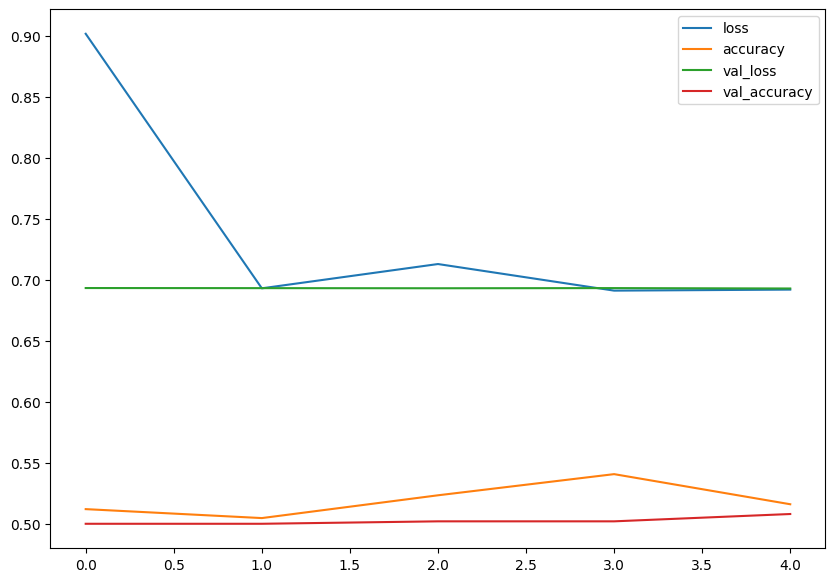

In [ ]:
#evaluating our model
pd.DataFrame(history_2.history).plot(figsize=(10,7))

In [ ]:
def plot_loss_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']
  epochs=range(len(history.history['loss']))
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='validation_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()
  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='validation_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()


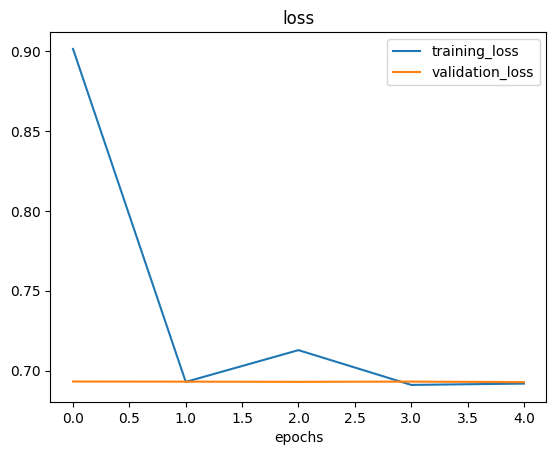

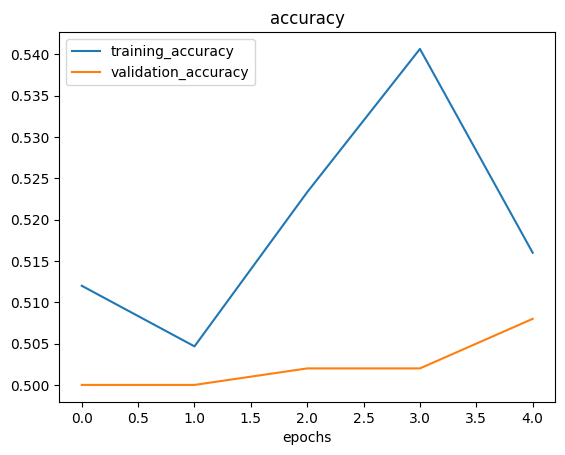

In [ ]:
plot_loss_curves(history_2)

In [ ]:
#adjusting the model parameters to reduce overfitting
model_3=tf.keras.Sequential()
model_3.add(tf.keras.layers.Conv2D(10,3,activation='relu', input_shape=(224,224,3)))
model_3.add(tf.keras.layers.MaxPool2D(pool_size=2))
model_3.add(tf.keras.layers.Conv2D(10,3,activation='relu'))
model_3.add(tf.keras.layers.MaxPool2D())
model_3.add(tf.keras.layers.Conv2D(10,3,activation='relu'))
model_3.add(tf.keras.layers.MaxPool2D())
model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=['accuracy'])
history_3=model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 260ms/step - loss: 0.6950 - accuracy: 0.5880 - val_loss: 0.5740 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.5179 - accuracy: 0.7540 - val_loss: 0.4222 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 20s 425ms/step - loss: 0.4485 - accuracy: 0.8040 - val_loss: 0.3933 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 14s 297ms/step - loss: 0.4113 - accuracy: 0.8207 - val_loss: 0.3831 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 13s 284ms/step - loss: 0.3720 - accuracy: 0.8433 - val_loss: 0.4451 - val_accuracy: 0.7700


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

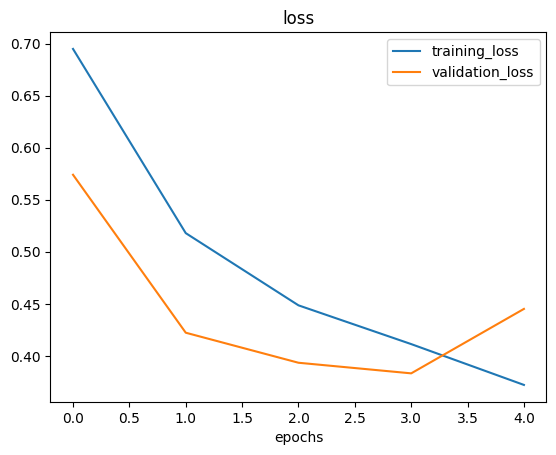

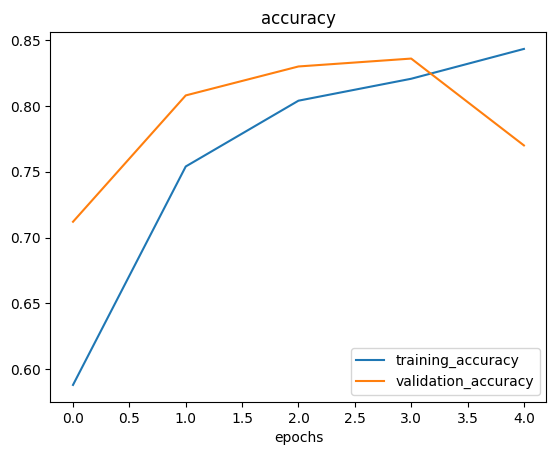

In [ ]:
plot_loss_curves(history_3)

In [ ]:
#data augmentation
train_datagen_augmented=ImageDataGenerator(rescale=1/255., rotation_range=0.2,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2, height_shift_range=0.2,horizontal_flip=True)

train_datagen=ImageDataGenerator(rescale=1/255.)

test_datagen= ImageDataGenerator(rescale=1/255.)

In [ ]:
print("Augmented Training Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir_path,target_size=(224,224), batch_size=32, class_mode='binary', shuffle=False)
train_data = train_datagen.flow_from_directory(train_dir_path, target_size=(224,224), batch_size=32, class_mode='binary', shuffle=False)
test_data = test_datagen.flow_from_directory(test_dir_path, target_size=(224,224), batch_size=32, class_mode='binary')


Augmented Training Data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#visualize augmented data
images,labels = train_data.next()
augmented_images,augmented_label=train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

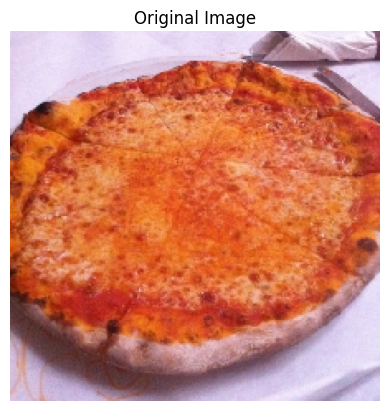

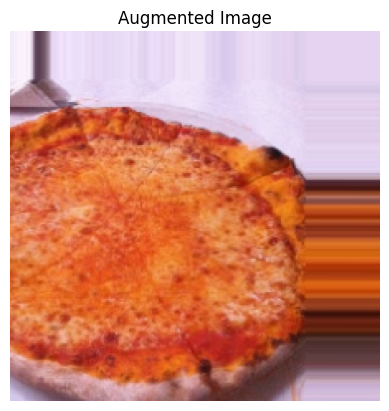

In [ ]:
random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f'Original Image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented Image')
plt.axis(False)

In [ ]:
model_4=tf.keras.Sequential()
model_4.add(tf.keras.layers.Conv2D(10,3,activation='relu', input_shape=(224,224,3)))
model_4.add(tf.keras.layers.MaxPool2D(pool_size=2))
model_4.add(tf.keras.layers.Conv2D(10,3,activation='relu'))
model_4.add(tf.keras.layers.MaxPool2D())
model_4.add(tf.keras.layers.Conv2D(10,3,activation='relu'))
model_4.add(tf.keras.layers.MaxPool2D())
model_4.add(tf.keras.layers.Flatten())
model_4.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003,),
                metrics=['accuracy'])
history_4=model_4.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 31s 620ms/step - loss: 0.8004 - accuracy: 0.3720 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 29s 613ms/step - loss: 0.6936 - accuracy: 0.3967 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 26s 558ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 36s 769ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 24s 507ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000


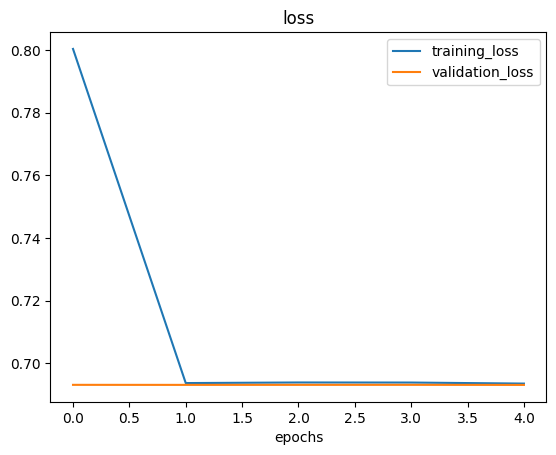

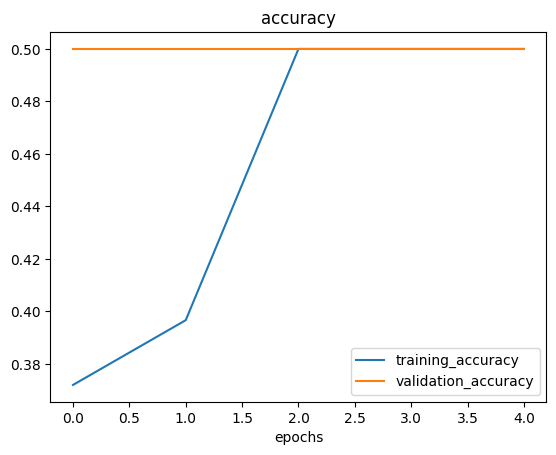

In [ ]:
plot_loss_curves(history_4)

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir_path, target_size=(224,224), class_mode='binary', batch_size=32, shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_5=tf.keras.Sequential()
model_5.add(tf.keras.layers.Conv2D(10,3, activation='relu', input_shape=(224,224,3)))
model_5.add(tf.keras.layers.MaxPool2D())
model_5.add(tf.keras.layers.Conv2D(10,3, activation='relu'))
model_5.add(tf.keras.layers.MaxPool2D())
model_5.add(tf.keras.layers.Conv2D(10,3, activation='relu'))
model_5.add(tf.keras.layers.MaxPool2D())
model_5.add(tf.keras.layers.Flatten())
model_5.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=['accuracy'])

In [ ]:
model_5.fit(train_data_augmented_shuffled,
            epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 38s 769ms/step - loss: 0.6881 - accuracy: 0.5627 - val_loss: 0.5789 - val_accuracy: 0.7360
Epoch 2/5
47/47 [==============================] - 26s 554ms/step - loss: 0.6241 - accuracy: 0.6673 - val_loss: 0.4665 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 24s 508ms/step - loss: 0.5516 - accuracy: 0.7467 - val_loss: 0.4968 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 24s 512ms/step - loss: 0.5256 - accuracy: 0.7613 - val_loss: 0.4057 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 26s 560ms/step - loss: 0.4802 - accuracy: 0.7833 - val_loss: 0.3435 - val_accuracy: 0.8680


In [ ]:
def load_and_prep_image(filename,img_shape=224):
  img= tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img


In [ ]:
steak = load_and_prep_image(f'{test_dir_path}steak/13719.jpg')
pred=model_5.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 171ms/step


In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  img = load_and_prep_image(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  pred_class=class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f'Predictions:{pred_class}')
  plt.axis(False)

1/1 [==============================] - 0s 31ms/step


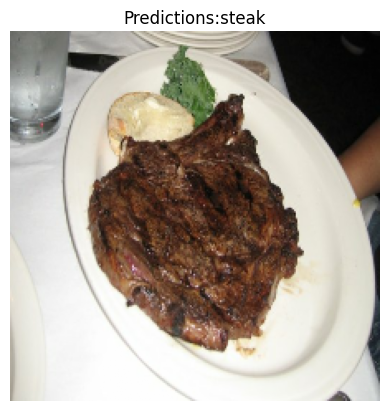

In [ ]:
pred_and_plot(model_5,f'{test_dir_path}steak/13719.jpg')

1/1 [==============================] - 0s 20ms/step


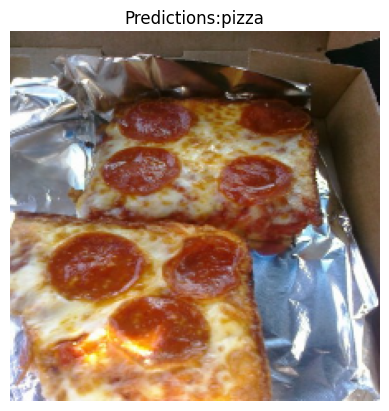

In [ ]:
pred_and_plot(model_5,f'{test_dir_path}pizza/11297.jpg')